In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,search_rank,product_name,old_price,discount,new_price,rating,number_of_ratings,official_store,brand_name,source
0,1,American Eagle AE Super Soft Graphic T-Shirt,800.0,50,400.0,4.8,5.0,Non,Not a brand,Jumia
1,2,American Eagle AE Super Soft Graphic T-Shirt,800.0,50,400.0,4.6,12.0,Non,Not a brand,Jumia
2,3,American Eagle Super Soft Graphic T-Shirt,950.0,50,475.0,4.3,93.0,Non,Not a brand,Jumia
3,4,Air Walk Printed Pattern Sleeves T-Shirt - Black,299.0,40,180.0,4.3,3.0,official_store,air,Jumia
4,5,American Eagle AE Super Soft Logo Graphic T-Shirt,700.0,50,350.0,4.4,33.0,Non,Not a brand,Jumia
...,...,...,...,...,...,...,...,...,...,...
2237,10,Short Sleeves FZ Flower Shirt Turquoise,499.0,50,250.0,NaN,NaN,official_store,sutra,sutra
2238,11,Short Sleeves Triangle Shirt Gray,479.0,50,240.0,NaN,NaN,official_store,sutra,sutra
2239,12,Short Sleeves Stripped FZ Shirt Turquoise,499.0,50,250.0,NaN,NaN,official_store,sutra,sutra
2240,1,Short Sleeves Triangle Shirt White,479.0,50,240.0,NaN,NaN,official_store,sutra,sutra


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   search_rank        2242 non-null   int64  
 1   product_name       2242 non-null   object 
 2   old_price          2242 non-null   float64
 3   discount           2242 non-null   int64  
 4   new_price          2242 non-null   float64
 5   rating             2000 non-null   float64
 6   number_of_ratings  2000 non-null   float64
 7   official_store     2242 non-null   object 
 8   brand_name         2242 non-null   object 
 9   source             2242 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 175.3+ KB


In [5]:
df.isnull().sum()

search_rank            0
product_name           0
old_price              0
discount               0
new_price              0
rating               242
number_of_ratings    242
official_store         0
brand_name             0
source                 0
dtype: int64

In [6]:
df[df["number_of_ratings"].isnull()]["source"].value_counts()

sutra    242
Name: source, dtype: int64

In [7]:
df.describe()

,search_rank,old_price,discount,new_price,rating,number_of_ratings
count,2242.000000,2242.000000,2242.000000,2242.000000,2000.000000,2000.000000
mean,893.203836,465.342221,36.601249,291.415143,1.687700,5.288000
std,626.637276,362.499473,19.939976,259.810217,2.136029,25.584533
min,1.000000,79.980000,0.000000,57.000000,0.000000,0.000000
25%,319.250000,299.000000,20.000000,164.000000,0.000000,0.000000
50%,879.500000,375.000000,40.000000,210.840000,0.000000,0.000000
75%,1439.750000,499.000000,50.000000,314.750000,4.000000,2.000000
max,2000.000000,6547.000000,89.000000,5237.000000,5.000000,373.000000


In [8]:
df.query("source == 'Jumia'").describe()

,search_rank,old_price,discount,new_price,rating,number_of_ratings
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,471.681130,35.150000,300.907375,1.687700,5.288000
std,577.494589,382.158086,20.539022,272.909928,2.136029,25.584533
min,1.000000,79.980000,0.000000,57.000000,0.000000,0.000000
25%,500.750000,295.000000,20.000000,162.000000,0.000000,0.000000
50%,1000.500000,372.000000,39.000000,210.840000,0.000000,0.000000
75%,1500.250000,499.000000,50.000000,349.020000,4.000000,2.000000
max,2000.000000,6547.000000,89.000000,5237.000000,5.000000,373.000000


**From comparing the describe with values from sutra and without it, the difference is not even noticable, as there are very little data points**

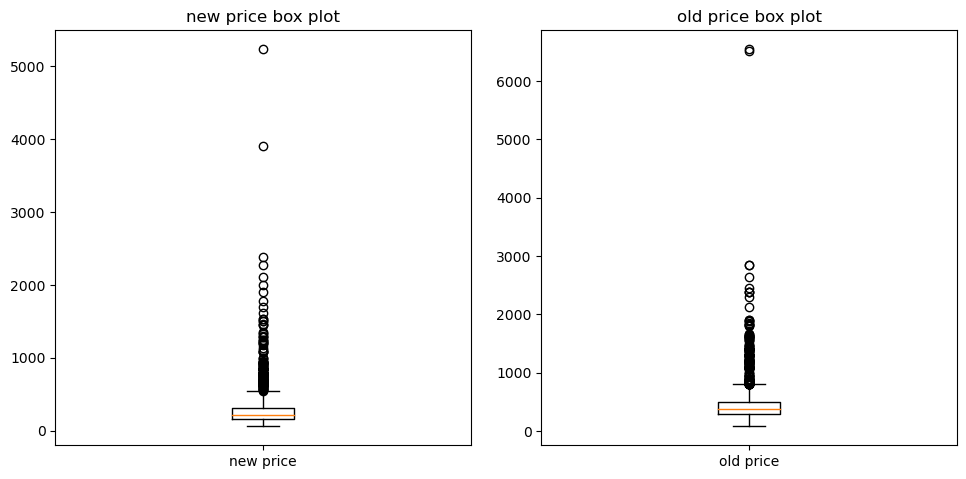

In [9]:
# this makes us make sevral graphs with each figure size as noted
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#This endicates that there is a space between each graph
plt.tight_layout(pad = 2)

#The first boxplot with it's title
ax1.boxplot(df["new_price"], labels = ["new price"])
ax1.set_title("new price box plot")

ax2.boxplot(df["old_price"], labels = ["old price"])
ax2.set_title("old price box plot");

It seems that the data is so skewd and not normal

# New price analysis
**The main variable in our analysis is the main price, the old price is useful to study how discount affects the number of ratings**

In [10]:
df["new_price"].describe()

count    2242.000000
mean      291.415143
std       259.810217
min        57.000000
25%       164.000000
50%       210.840000
75%       314.750000
max      5237.000000
Name: new_price, dtype: float64

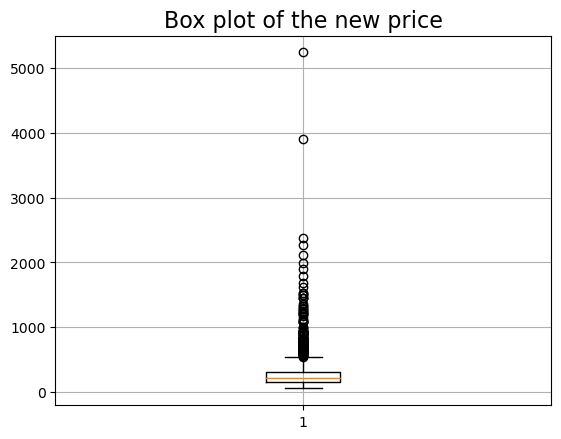

In [11]:

plt.boxplot(df["new_price"])
plt.grid(True)

plt.title("Box plot of the new price", size = 16);

From the boxplot we can see that all the outliers are in the high prices, there is no seller unique beacuse of low prices, this means that the **low prices are not high competitve advantages**

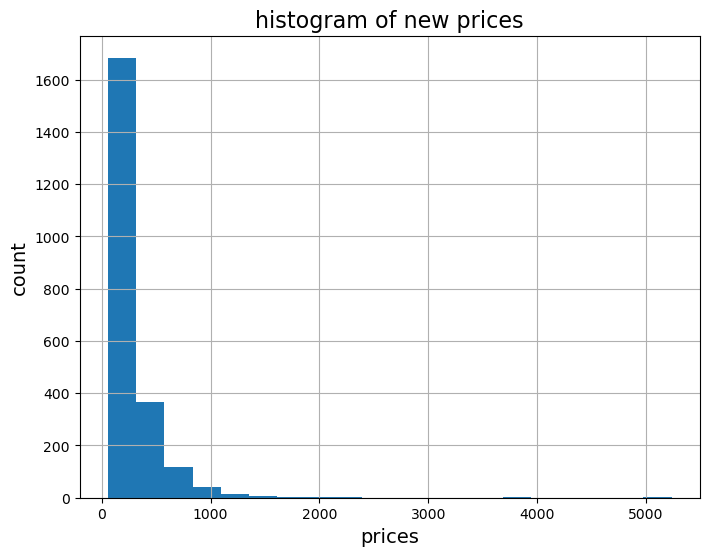

In [12]:
plt.figure(figsize=(8, 6))
df["new_price"].hist(bins = 20)

plt.title("histogram of new prices", size = 16)
plt.xlabel("prices", size = 14)
plt.ylabel("count", size = 14);

**These outliers make me think about some question**
>**Are these outliers related to being a brand or not?**
<br>

>**Does these outliers have high sales compared to normal prices?**

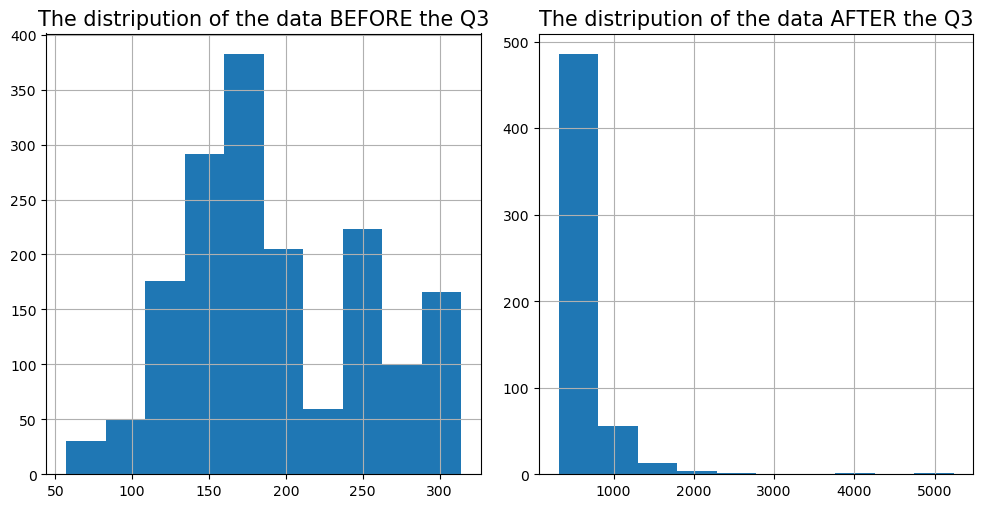

In [25]:
#I want to look at the distripution of 75% of data
q3 = np.percentile(df["new_price"], 75)
data_1 = df[df["new_price"] <= q3]

data_2 = df[df["new_price"] >= q3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
plt.tight_layout()

ax1.hist(data_1["new_price"])
ax1.grid(True)
ax1.set_title("The distripution of the data BEFORE the Q3", size = 15);

ax2.hist(data_2["new_price"])
ax2.grid(True)
ax2.set_title("The distripution of the data AFTER the Q3", size = 15);

In [31]:
data_1["number_of_ratings"].describe()

count    1445.000000
mean        4.812457
std        27.178034
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       373.000000
Name: number_of_ratings, dtype: float64

## Hypothis
>**In The first hist, there are two peakes, this means that probabply there are two groups of data, maybe this becouse the two different sources of data**
<br>

>**For the right hist, we need to study these outliers**

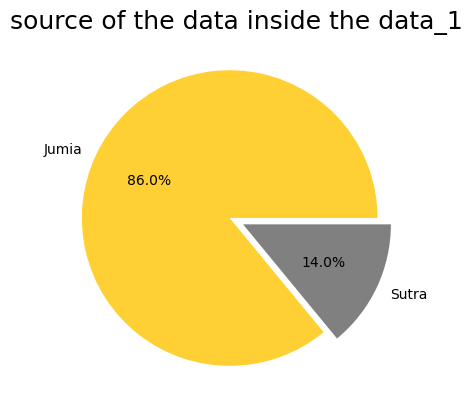

In [14]:
#I want to say the sources of the first data
data = data_1["source"].value_counts()
labels = ["Jumia", "Sutra"]

plt.pie(data, labels = labels, colors = ("#FFD034", "gray"), autopct = "%1.1f%%", explode = [0.05, 0.05])

plt.title("source of the data inside the data_1", size = 18);

The perecntage of sutra is not enough to make this difference, but i will keep looking

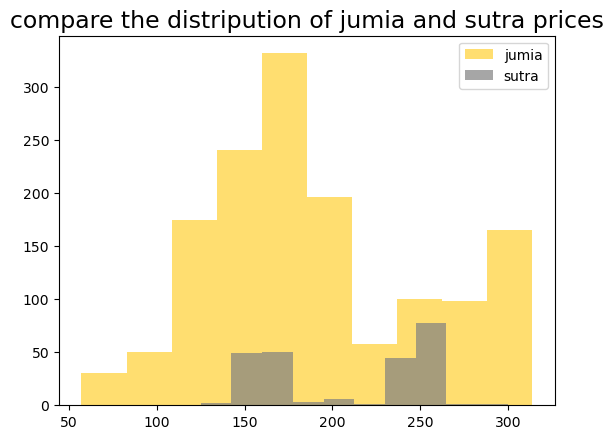

In [15]:
plt.hist(data_1[data_1["source"] == "Jumia"]["new_price"], color = "#FFD034", alpha = 0.7, label = "jumia")
plt.hist(data_1[data_1["source"] == "sutra"]["new_price"], color = "gray", alpha = 0.7, label = "sutra")

plt.legend()

plt.title("compare the distripution of jumia and sutra prices", size = 17);

**From this hist we can see that the same thing (having to different peaks, happens again with data from sutra**
so it's intersting that they both have the same pattern

## Hypothesis
>**The reason for the pattern is the higher prices peak represent the products, that doesn't have discount so they have higher prices than those who have dscount**

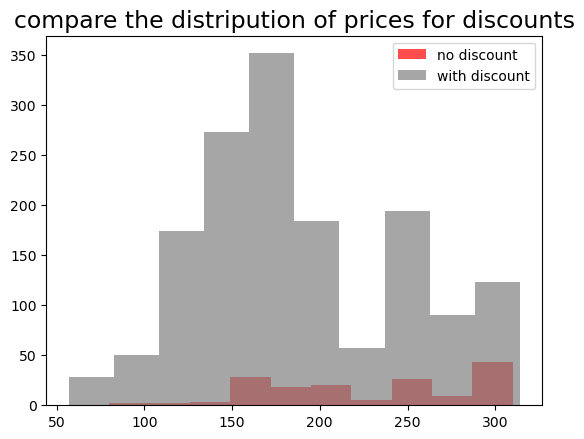

In [16]:
plt.hist(data_1[data_1["discount"] == 0]["new_price"], color = "red", alpha = 0.7, label = "no discount")
plt.hist(data_1[data_1["discount"] != 0]["new_price"], color = "gray", alpha = 0.7, label = "with discount")

plt.legend()

plt.title("compare the distripution of prices for discounts", size = 17);

The **Hypothesis is wrong** as we got the same results, the same pattern apears in both groups, this means that these two peakes **Are not related to disconut**

In [17]:
df

,search_rank,product_name,old_price,discount,new_price,rating,number_of_ratings,official_store,brand_name,source
0,1,American Eagle AE Super Soft Graphic T-Shirt,800.0,50,400.0,4.8,5.0,Non,Not a brand,Jumia
1,2,American Eagle AE Super Soft Graphic T-Shirt,800.0,50,400.0,4.6,12.0,Non,Not a brand,Jumia
2,3,American Eagle Super Soft Graphic T-Shirt,950.0,50,475.0,4.3,93.0,Non,Not a brand,Jumia
3,4,Air Walk Printed Pattern Sleeves T-Shirt - Black,299.0,40,180.0,4.3,3.0,official_store,air,Jumia
4,5,American Eagle AE Super Soft Logo Graphic T-Shirt,700.0,50,350.0,4.4,33.0,Non,Not a brand,Jumia
...,...,...,...,...,...,...,...,...,...,...
2237,10,Short Sleeves FZ Flower Shirt Turquoise,499.0,50,250.0,NaN,NaN,official_store,sutra,sutra
2238,11,Short Sleeves Triangle Shirt Gray,479.0,50,240.0,NaN,NaN,official_store,sutra,sutra
2239,12,Short Sleeves Stripped FZ Shirt Turquoise,499.0,50,250.0,NaN,NaN,official_store,sutra,sutra
2240,1,Short Sleeves Triangle Shirt White,479.0,50,240.0,NaN,NaN,official_store,sutra,sutra


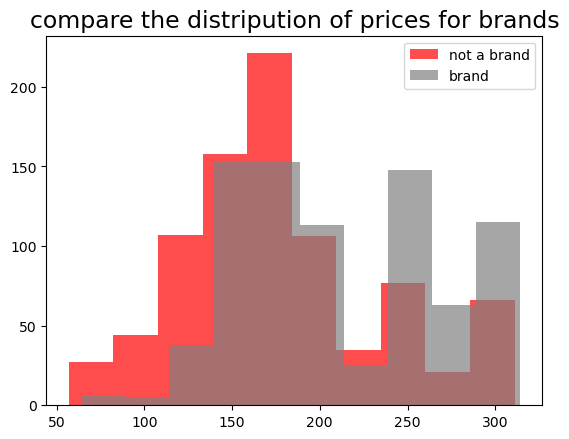

In [18]:
plt.hist(data_1[data_1["official_store"] == df["official_store"][0]]["new_price"], color = "red", alpha = 0.7, label = "not a brand")
plt.hist(data_1[data_1["official_store"] == df["official_store"][3]]["new_price"], color = "gray", alpha = 0.7, label = "brand")

plt.legend()

plt.title("compare the distripution of prices for brands", size = 17);

I can't find an explination for these peaks so i will just ignore it for now

## Study outliers

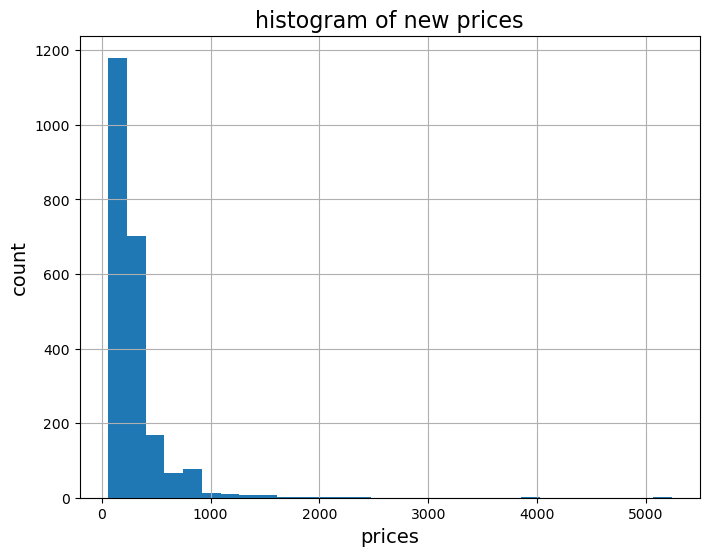

In [33]:
plt.figure(figsize=(8, 6))
df["new_price"].hist(bins = 30)

plt.title("histogram of new prices", size = 16)
plt.xlabel("prices", size = 14)
plt.ylabel("count", size = 14);

In [34]:
df["new_price"].describe()

count    2242.000000
mean      291.415143
std       259.810217
min        57.000000
25%       164.000000
50%       210.840000
75%       314.750000
max      5237.000000
Name: new_price, dtype: float64

**As we can see here 75% of the data are below 314**

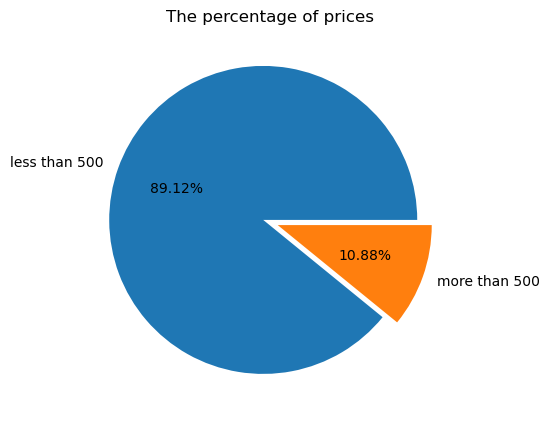

In [56]:
less = len(df[df["new_price"] <= 500])
more = len(df[df["new_price"] >= 500])

data = []
data.append([less, more])
data = data[0]

plt.figure(figsize = (5, 5))

labels = ["less than 500", "more than 500"]

plt.pie(data, labels = labels, autopct = "%1.2f%%", explode = [0.05, 0.05])

plt.title("The percentage of prices");

**and the prices less than 500 represnt 90% of the data** so the data is not spreadet it just have outliers

In [58]:
#I want to see the std for the data less than 500 to make sure
df[df["new_price"] <= 500]["new_price"].describe()

count    1998.000000
mean      225.217553
std        93.667232
min        57.000000
25%       150.000000
50%       199.000000
75%       285.180000
max       499.000000
Name: new_price, dtype: float64

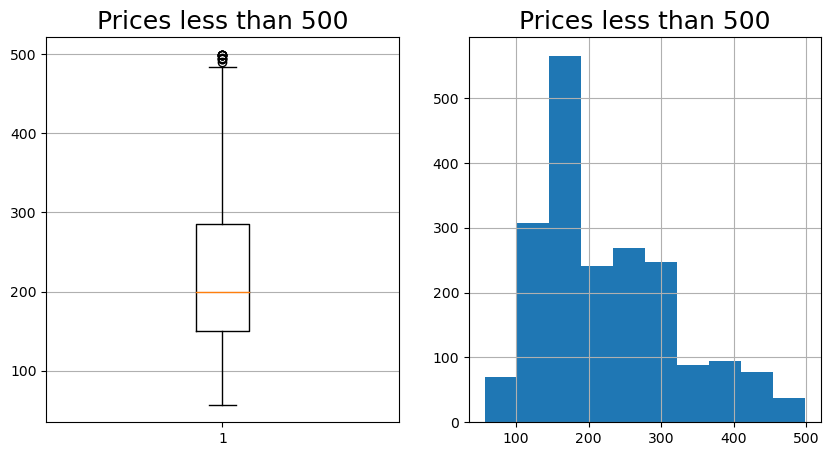

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.boxplot(df[df["new_price"] <= 500]["new_price"])
ax1.grid(True, axis = "y")
ax1.set_title("Prices less than 500", size = 18)

ax2.hist(df[df["new_price"] <= 500]["new_price"])
ax2.grid(True)
ax2.set_title("Prices less than 500", size = 18);

### Conclusions
>**The prices are not so spread, the only thing is that there are alot of outliers, as 90% of the data fall under 500 EGP, and the distripution of prices under 500, is normal with leaning a little bit towards the lower prices**